# Homework 4 - Applied ML

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                                   # For pretty plot

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 50                     # For displaying all the columns of our dataset

import warnings
warnings.filterwarnings('ignore')

The first step is data wrangling as usual.

# Data Wrangling

In [2]:
# LOAD DATA
df_csv = pd.read_csv('CrowdstormingDataJuly1st.csv', header=0)

In [3]:
df_csv.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


The data is given as a player-referee dyad, which means that there is a row for each player-referee pair.<br>
We see that we have around 150k rows, and 28 columns.

In [4]:
df_csv.shape

(146028, 28)

In [5]:
df_csv.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


Realising that we have `Null` values, we proceeed with handling them.

## Null values handling

In this homework, we are interested in the skin color of the players.<br>
Thus, we remove those players not having a photo (photoID is `NaN`) since they will miss the classification from the raters.

In [6]:
df_with_photo = df_csv.dropna(subset=['photoID'])

In [7]:
df_with_photo.shape

(124621, 28)

In [8]:
df_with_photo.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,124575.000000,123868.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124468.000000,1.244680e+05,1.244680e+05,124468.000000,1.244680e+05,124468.000000
mean,182.125330,76.368102,2.993613,1.342663,0.714968,0.935982,0.353432,0.399170,0.012061,0.012751,0.264255,0.302862,1531.111546,29.488096,0.348123,1.817187e+04,6.287461e-04,0.463797,1.884147e+04,0.002988
std,6.804843,7.188595,3.580429,1.879913,1.143873,1.422906,0.944250,0.821651,0.111052,0.113901,0.295382,0.293020,916.314559,27.963752,0.032087,1.261437e+05,4.788647e-03,0.219206,1.296022e+05,0.019719
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1574.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2332.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


We see that we still have missing values for some important columns such as `meanIAT`. Let's have a look at them:

In [9]:
df_with_photo[df_with_photo['meanIAT'].isnull()]['Alpha_3'].value_counts()

QAT      90
Mali     49
NAM      11
ANT       2
Name: Alpha_3, dtype: int64

Here, we have extracted the countries of the referees missing the `meanIAT` value.<br>
We notice that they refer to countries different from the ones of the leagues we are analyzing. 
They might have been introduced by players who went abroad for some period (see experts' paper).
Since these instances are not relevant in our classification task, we decide to remove them as well.

In [10]:
df_all_stats = df_with_photo[~df_with_photo['meanIAT'].isnull()]

In [11]:
df_all_stats.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [12]:
df_all_stats.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,124422.000000,123715.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,124468.000000,1.244680e+05,1.244680e+05,124468.000000,1.244680e+05,124468.000000
mean,182.127060,76.370327,2.995790,1.343622,0.715461,0.936707,0.353657,0.399516,0.012075,0.012766,0.264070,0.302682,1531.928279,29.442081,0.348123,1.817187e+04,6.287461e-04,0.463797,1.884147e+04,0.002988
std,6.804845,7.188111,3.582036,1.880733,1.144345,1.423526,0.944674,0.822019,0.111119,0.113970,0.295304,0.292933,916.138130,27.868372,0.032087,1.261437e+05,4.788647e-03,0.219206,1.296022e+05,0.019719
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1574.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2332.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


We see that still `height` and `weight` have missing data:

In [13]:
len(df_all_stats[df_all_stats['height'].isnull()]['playerShort'].unique())

3

In [14]:
len(df_all_stats[df_all_stats['weight'].isnull()]['playerShort'].unique())

21

However, the number of player affected is not large. Since such information is very descriptive for a player, we decide to remove these missing data too.

In [15]:
no_height_idx = df_all_stats['height'].isnull()

In [16]:
no_weight_idx = df_all_stats['weight'].isnull()

In [17]:
# take the OR of the two indices (represented as pd.Series)
no_height_weight = no_height_idx | no_weight_idx

In [18]:
df_h_w = df_all_stats[~no_height_weight]

In [19]:
df_h_w.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,123715.000000,1.237150e+05,1.237150e+05,123715.000000,1.237150e+05,123715.000000
mean,182.126961,76.370327,3.003888,1.347719,0.717593,0.938577,0.354419,0.400736,0.012133,0.012820,0.263658,0.302401,1531.698598,29.374247,0.348138,1.816445e+04,6.280749e-04,0.463761,1.883291e+04,0.002986
std,6.808317,7.188111,3.590080,1.884632,1.146612,1.426240,0.946458,0.823602,0.111382,0.114208,0.294954,0.292669,916.175687,27.867170,0.032101,1.263947e+05,4.793125e-03,0.219246,1.298598e+05,0.019746
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,178.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1574.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2332.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [20]:
df_h_w.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Let's have a look at the missing values for the categorical attributes.

In [21]:
len(df_h_w[df_h_w['playerShort'].isnull()]['playerShort'].unique())

0

In [22]:
len(df_h_w[df_h_w['player'].isnull()]['playerShort'].unique())

0

In [23]:
len(df_h_w[df_h_w['club'].isnull()]['playerShort'].unique())

0

In [24]:
len(df_h_w[df_h_w['leagueCountry'].isnull()]['playerShort'].unique())

0

In [25]:
len(df_h_w[df_h_w['birthday'].isnull()]['playerShort'].unique())

0

In [26]:
len(df_h_w[df_h_w['position'].isnull()]['playerShort'].unique())

145

So, the only missing values are for the positions of 145 players. As we can see below, this number is less than 10% of the players that we have.<br>
Since this value is considered to be the main factor in determining the number of cards, we decide to remove those players.

In [27]:
len(df_h_w['playerShort'].unique())

1564

In [28]:
df_clean = df_h_w[~df_h_w['position'].isnull()]

In [29]:
len(df_clean[df_clean['position'].isnull()]['playerShort'].unique())

0

In [30]:
len(df_clean['playerShort'].unique())

1419

## Merge the rates of the two raters

We will now combine the raters' ratings to create a new column `skin_color` that is a binary label: 0 for white, 1 for black.<br>
We choose binary classification rather than multi-level classification for this case.<br>
There is no reason (from our point of view) that a rater is more accurate than another, so we take the mean of the ratings in order to construct `skin_color`.<br>
Note that we also tried multi-level classification, by mapping the mean rating to a 5-point label (as described by the mean_to_label function below). This resulted in a much lower accuracy (~35%) as expected.

In [31]:
mean_skin = df_clean[['rater1', 'rater2']].mean(axis=1)

In [33]:
mean_skin.head()

0    0.375
1    0.750
5    0.125
6    0.125
7    1.000
dtype: float64

In [34]:
def mean_to_label(skin):
    if skin<=0.2:
        return 0
    elif skin<=0.4:
        return 1
    elif skin<=0.6:
        return 2
    elif skin<=0.8:
        return 3
    else:
        return 4

In [35]:
def binary_label(skin):
    if skin < 0.5:
        return 0
    else:
        return 1

In [36]:
skin_label = mean_skin.apply(binary_label)

In [37]:
skin_label.head()

0    0
1    1
5    0
6    0
7    1
dtype: int64

In [38]:
df_clean['skin_color'] = skin_label

In [39]:
df_clean.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_color
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1


In [40]:
df = df_clean.drop(['rater1', 'rater2'], axis=1)

In [41]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_color
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1


# Exercise 1

## Train a $sklearn.ensemble.RandomForestClassifier$ that given a soccer player description outputs his skin color.<br> 

Before answering the questions asked by the exercise, we need to define our "player description".

### Player representation

In [42]:
df.columns.values

array(['playerShort', 'player', 'club', 'leagueCountry', 'birthday',
       'height', 'weight', 'position', 'games', 'victories', 'ties',
       'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards',
       'photoID', 'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT',
       'seIAT', 'meanExp', 'nExp', 'seExp', 'skin_color'], dtype=object)

Since we are interested in representing a given player, we discard the attributes `photoID, refNum, refCountry, Alpha_3`.

In [43]:
df_player = df.drop(labels=['photoID', 'refNum', 'refCountry', 'Alpha_3'], axis=1)

In [44]:
df_player.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_color
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1


In [45]:
groupby_player = df_player.groupby('playerShort')

For each player, we sum `games, victories, ties, defeats, goals, yellowCards, yellowReds, redCards`.

In [46]:
games = groupby_player['games'].aggregate(np.sum)
victories = groupby_player['victories'].aggregate(np.sum)
ties = groupby_player['ties'].aggregate(np.sum)
defeats = groupby_player['defeats'].aggregate(np.sum)
goals = groupby_player['goals'].aggregate(np.sum)
yellowCards = groupby_player['yellowCards'].aggregate(np.sum)
yellowReds = groupby_player['yellowReds'].aggregate(np.sum)
redCards = groupby_player['redCards'].aggregate(np.sum)

And we take the weighted mean of `meanIAT, meanExp` (mean bias the player has been subject to). This can be achieved by weighting the `meanIAT` (and `meanExp`) of the referee's country, the the number of games refereed for a particular player.

In [47]:
def get_meanIAT(df):
    weighted_products = df['games'] * df['meanIAT']
    total_games = np.sum(df['games'])
    return np.sum(weighted_products)/total_games

meanIAT = groupby_player.apply(get_meanIAT)

In [48]:
def get_meanExp(df):
    weighted_products = df['games'] * df['meanExp']
    total_games = np.sum(df['games'])
    return np.sum(weighted_products)/total_games

meanExp = groupby_player.apply(get_meanExp)

We also calculate the weighted standard deviation of the aggregated weighted `meanIAT` and `meanExp`. For this, we assume that the `IAT` and `Exp` are normally distributed, which holds given the number of samples (in `nIAT` and `nExp`) is high.

In [49]:
def get_secMomIAT(df):
    total_games = np.sum(df['games'])
    varIAT = df['games'] * (df['seIAT'])**2/total_games
    mean_of_squaresIAT = df['games'] * (df['meanIAT'])**2/total_games
    return np.sum(varIAT + mean_of_squaresIAT)

secMomIAT = groupby_player.apply(get_secMomIAT)
seIAT = np.sqrt(secMomIAT - meanIAT**2)

In [50]:
def get_secMomExp(df):
    total_games = np.sum(df['games'])
    varExp = df['games'] * (df['seExp'])**2/total_games
    mean_of_squaresExp = df['games'] * (df['meanExp'])**2/total_games
    return np.sum(varExp + mean_of_squaresExp)

secMomExp = groupby_player.apply(get_secMomExp )
seExp = np.sqrt(secMomExp - meanExp**2)

Thus, we create our new DataFrame:

In [51]:
df_player.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_color
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1


In [52]:
df_players = df_player[['playerShort', 'leagueCountry', 'height', 'weight', 'position', 'skin_color']]

In [53]:
df_players.head()

,playerShort,leagueCountry,height,weight,position,skin_color
0,lucas-wilchez,Spain,177.0,72.0,Attacking Midfielder,0
1,john-utaka,France,179.0,82.0,Right Winger,1
5,aaron-hughes,England,182.0,71.0,Center Back,0
6,aleksandar-kolarov,England,187.0,80.0,Left Fullback,0
7,alexander-tettey,England,180.0,68.0,Defensive Midfielder,1


In [54]:
df_players.shape

(115457, 6)

In [55]:
df_players.set_index(['playerShort'], inplace=True)

We take only the unique set of players, now that the data of each player is aggregate.

In [57]:
df_unique_players = df_players.drop_duplicates()

In [58]:
df_unique_players.shape

(1343, 5)

In [59]:
df_unique_players['games'] = games
df_unique_players['victories'] = victories
df_unique_players['ties'] = ties
df_unique_players['defeats'] = defeats
df_unique_players['yellowCards'] = yellowCards
df_unique_players['yellowReds'] = yellowReds
df_unique_players['redCards'] = redCards
df_unique_players['meanIAT'] = meanIAT
df_unique_players['meanExp'] = meanExp
df_unique_players['seIAT'] = seIAT
df_unique_players['seExp'] = seExp

In [60]:
df_unique_players.head()

,leagueCountry,height,weight,position,skin_color,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp
playerShort,,,,,,,,,,,,,,,,
lucas-wilchez,Spain,177.0,72.0,Attacking Midfielder,0,144,65,32,47,21,1,2,0.354267,0.618606,0.018960,0.114434
john-utaka,France,179.0,82.0,Right Winger,1,427,183,101,143,33,0,2,0.330643,0.332495,0.033839,0.194338
aaron-hughes,England,182.0,71.0,Center Back,0,654,247,179,228,19,0,0,0.333195,0.400637,0.019941,0.142181
aleksandar-kolarov,England,187.0,80.0,Left Fullback,0,285,138,57,90,50,4,3,0.354477,0.470089,0.029963,0.161181
alexander-tettey,England,180.0,68.0,Defensive Midfielder,1,214,88,54,72,34,0,0,0.340754,0.488418,0.024648,0.226929


In [61]:
df_unique_players.index.is_unique

True

We now remove the `playerShort` information since this would not help us in classifying a player.

In [62]:
df_unique_players.reset_index(inplace=True)

In [63]:
df_unique_players.drop(['playerShort'], axis=1, inplace=True)

In [64]:
df_unique_players.head()

,leagueCountry,height,weight,position,skin_color,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp
0,Spain,177.0,72.0,Attacking Midfielder,0,144,65,32,47,21,1,2,0.354267,0.618606,0.018960,0.114434
1,France,179.0,82.0,Right Winger,1,427,183,101,143,33,0,2,0.330643,0.332495,0.033839,0.194338
2,England,182.0,71.0,Center Back,0,654,247,179,228,19,0,0,0.333195,0.400637,0.019941,0.142181
3,England,187.0,80.0,Left Fullback,0,285,138,57,90,50,4,3,0.354477,0.470089,0.029963,0.161181
4,England,180.0,68.0,Defensive Midfielder,1,214,88,54,72,34,0,0,0.340754,0.488418,0.024648,0.226929


Our classifier accepts only numerical values, so we need to modify our categorical features:
- leagueCountry
- position

In [65]:
len(df_unique_players['leagueCountry'].unique())

4

In [66]:
len(df_unique_players['position'].unique())

12

In [67]:
df_unique_players.shape

(1343, 16)

Since the number different values that can be assumed by each categorical feature is not large, we can add a new binary feature for each of them (1 if the original record had that value, 0 otherwise).

In [68]:
leagues = pd.get_dummies(df_unique_players['leagueCountry'])

In [69]:
leagues.head()

,England,France,Germany,Spain
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [70]:
positions = pd.get_dummies(df_unique_players['position'])

In [71]:
df_unique_players.drop(['leagueCountry','position'], axis=1, inplace=True)

In [72]:
df_unique_players_with_dummies = pd.concat([df_unique_players, leagues, positions], axis=1)

In [73]:
df_unique_players_with_dummies.head()

,height,weight,skin_color,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp,England,France,Germany,Spain,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
0,177.0,72.0,0,144,65,32,47,21,1,2,0.354267,0.618606,0.018960,0.114434,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,82.0,1,427,183,101,143,33,0,2,0.330643,0.332495,0.033839,0.194338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,182.0,71.0,0,654,247,179,228,19,0,0,0.333195,0.400637,0.019941,0.142181,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,187.0,80.0,0,285,138,57,90,50,4,3,0.354477,0.470089,0.029963,0.161181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,180.0,68.0,1,214,88,54,72,34,0,0,0.340754,0.488418,0.024648,0.226929,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_unique_players_with_dummies.shape

(1343, 30)

### Model selection & assessment

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

In [76]:
y = df_unique_players_with_dummies['skin_color'].values

In [77]:
X = df_unique_players_with_dummies.drop(['skin_color'], axis=1).values

Firstly, let's see how the default classifier performs.

In [78]:
rf = RandomForestClassifier()

First, we try training and testing on the entire dataset.

In [79]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
pred1 = rf.predict(X)

In [81]:
print(metrics.accuracy_score(y, pred1))

0.982129560685


In [82]:
rf.feature_importances_

array([ 0.04553503,  0.05450278,  0.04009861,  0.06135595,  0.05164863,
        0.05566121,  0.04525199,  0.03141519,  0.03637589,  0.04708336,
        0.07207874,  0.09695262,  0.08670369,  0.03441687,  0.04533549,
        0.02734766,  0.02175365,  0.01130303,  0.02482539,  0.02854939,
        0.00264725,  0.01206984,  0.01095223,  0.0130739 ,  0.00572611,
        0.01222042,  0.00886198,  0.00514462,  0.01110847])

This is obviously an overfitting issue, as we are training and testing on the same data.

Next, we try with a train and test split.

In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.8)

In [85]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
pred2 = rf.predict(X_te)
print(metrics.accuracy_score(y_te, pred2))

0.751627906977


This seems to be a more reasonable accuracy.

Next, we try to do cross validation, and observe the accuracy scores.

In [87]:
from sklearn.cross_validation import cross_val_score

In [88]:
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

In [89]:
scores.mean()

0.75947804835471766

In [90]:
scores

array([ 0.76296296,  0.82222222,  0.74074074,  0.76296296,  0.70895522,
        0.73880597,  0.7761194 ,  0.73880597,  0.75373134,  0.78947368])

### _Show how different parameters passed to the Classifier affect the overfitting issue. Perform cross-validation to mitigate the overfitting of your model._

As we have seen in class and also according to [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#parameters), the main parameters to adjust when using Random Forests are: 
- `n_estimators`: the number of trees in the forest.<br> The larger the better (variance reduction), but also the longer it will take to compute. 
- `max_features`: the size of the random subsets of features to consider when splitting a node.<br> The lower the greater the reduction of variance, but also the greater the increase in bias. An empirical good default value for classification tasks is `max_features=sqrt(n_features)`(where `n_features` is the number of features in the data).
- `max_depth`: the maximum depth of the tree.<br> The larger the better (bias reduction).

To tune these parameters, we make use of GridSearchCV, which allows us to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [91]:
from sklearn.grid_search import GridSearchCV

In [92]:
# define the parameter values that should be searched
n_trees = np.round(np.logspace(start=0, stop=2, num=10)).astype(int)
features_options = ['sqrt', 'log2']
depths = np.round(np.linspace(start=1, stop=100, num=9)).astype(int)
depths = np.append(depths, [None])  # None is the default value: 
                                    # nodes are expanded until all leaves are pure or 
                                    # until all leaves contain less than min_samples_split samples

In [93]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_trees, max_features=features_options, max_depth=depths)
print(param_grid)

{'n_estimators': array([  1,   2,   3,   5,   8,  13,  22,  36,  60, 100]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([1, 13, 26, 38, 50, 63, 75, 88, 100, None], dtype=object)}


In [94]:
# instantiate and fit the grid
grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,   2,   3,   5,   8,  13,  22,  36,  60, 100]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([1, 13, 26, 38, 50, 63, 75, 88, 100, None], dtype=object)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [97]:
# view one entry of the results
grid.grid_scores_[0]

mean: 0.77439, std: 0.04815, params: {'n_estimators': 1, 'max_features': 'sqrt', 'max_depth': 1}

In [98]:
grid.best_score_

0.79746835443037978

In [99]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=38, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
grid.best_params_

{'max_depth': 38, 'max_features': 'sqrt', 'n_estimators': 36}

So, we select this model as our best model.

In [101]:
# COMMENTED CELL
# rf_best = RandomForestClassifier(n_estimators=36, max_depth=38, max_features='sqrt')

In [102]:
rf_best = grid.best_estimator_

### _Once you assessed your model, inspect the $feature\_importances\_$ attribute and discuss the obtained results._

In [103]:
rf = rf_best

In [104]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=38, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
rf.feature_importances_

array([ 0.0496348 ,  0.05697783,  0.05782293,  0.05910164,  0.05905652,
        0.06255818,  0.05629646,  0.02304663,  0.02752096,  0.09961183,
        0.08667374,  0.11825933,  0.09415997,  0.01062815,  0.02006872,
        0.01556942,  0.00748029,  0.00639702,  0.00914909,  0.0181288 ,
        0.00375174,  0.00664651,  0.01167356,  0.00542102,  0.00387608,
        0.00785972,  0.00818315,  0.00314091,  0.01130501])

In [106]:
x_vals = df_unique_players_with_dummies.drop(['skin_color'], axis=1).columns.values

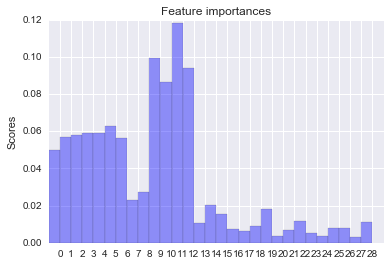

In [118]:
fig, ax = plt.subplots()

n_groups = len(rf.feature_importances_)
index = np.arange(n_groups)
index_axis = range(0, len(index))

bar_width = 1
opacity = 0.4

plt.bar(index, rf.feature_importances_, bar_width,
                 alpha=opacity, color='b')

plt.ylabel('Scores')
plt.title('Feature importances')
plt.xticks(index + bar_width, index_axis)

plt.show()

In [129]:
features_df = pd.DataFrame([index_axis], columns=x_vals)
features_df.append(pd.DataFrame([rf.feature_importances_], columns=x_vals))

,height,weight,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp,England,France,Germany,Spain,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.00000,13.000000,14.000000,15.000000,16.00000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.00000,26.000000,27.000000,28.000000
0,0.049635,0.056978,0.057823,0.059102,0.059057,0.062558,0.056296,0.023047,0.027521,0.099612,0.086674,0.118259,0.09416,0.010628,0.020069,0.015569,0.00748,0.006397,0.009149,0.018129,0.003752,0.006647,0.011674,0.005421,0.003876,0.00786,0.008183,0.003141,0.011305


So, we can see that the mean bias a given player has been subject to is the most important feature considered by the model (`meanIAT`, `meanExp`, `seIAT` and `seExp`). The position of each player does not seem to have a huge impact on the model.

### _With different assumptions on the data (e.g., dropping certain features even before feeding them to the classifier), can you obtain a substantially different $feature\_importances\_$ attribute?_

So, let's see what are the most important features for our best model if we do not compute the mean bias each player has been subject to.

In [130]:
df_unique_players_with_dummies.head()

,height,weight,skin_color,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp,England,France,Germany,Spain,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
0,177.0,72.0,0,144,65,32,47,21,1,2,0.354267,0.618606,0.018960,0.114434,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,82.0,1,427,183,101,143,33,0,2,0.330643,0.332495,0.033839,0.194338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,182.0,71.0,0,654,247,179,228,19,0,0,0.333195,0.400637,0.019941,0.142181,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,187.0,80.0,0,285,138,57,90,50,4,3,0.354477,0.470089,0.029963,0.161181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,180.0,68.0,1,214,88,54,72,34,0,0,0.340754,0.488418,0.024648,0.226929,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
X_no_bias = df_unique_players_with_dummies.drop(['skin_color', 'meanIAT', 'meanExp', 'seIAT', 'seExp'], axis=1).values

In [132]:
rf_no_bias = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'], 
                                    max_depth=grid.best_params_['max_depth'], 
                                    max_features=grid.best_params_['max_features'])
rf_no_bias.fit(X_no_bias, y)
rf_no_bias.feature_importances_

array([ 0.08084535,  0.09071963,  0.10864742,  0.11474939,  0.10531425,
        0.10488957,  0.09581868,  0.03695013,  0.0454062 ,  0.01724801,
        0.03877661,  0.01703627,  0.01724675,  0.01162346,  0.0127081 ,
        0.01621715,  0.0030046 ,  0.01157865,  0.01518038,  0.01177441,
        0.00774212,  0.01162416,  0.00825896,  0.00652715,  0.01011259])

In [133]:
x_vals_no_bias = df_unique_players_with_dummies.drop(['skin_color', 'meanIAT', 'meanExp', 'seIAT', 'seExp'], axis=1).columns.values

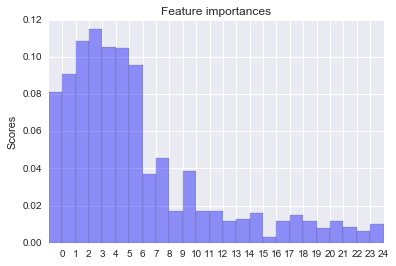

In [135]:
fig, ax = plt.subplots()

n_groups = len(rf_no_bias.feature_importances_)
index = np.arange(n_groups)
index_axis = range(0, len(index))

bar_width = 1
opacity = 0.4

plt.bar(index, rf_no_bias.feature_importances_, bar_width,
                 alpha=opacity, color='b')

plt.ylabel('Scores')
plt.title('Feature importances')
plt.xticks(index + bar_width, index_axis)

plt.show()

In [136]:
features_no_bias_df = pd.DataFrame([index_axis], columns=x_vals_no_bias)
features_no_bias_df.append(pd.DataFrame([rf_no_bias.feature_importances_], columns=x_vals_no_bias))

,height,weight,games,victories,ties,defeats,yellowCards,yellowReds,redCards,England,France,Germany,Spain,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
0,0.000000,1.00000,2.000000,3.000000,4.000000,5.00000,6.000000,7.00000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.00000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000
0,0.080845,0.09072,0.108647,0.114749,0.105314,0.10489,0.095819,0.03695,0.045406,0.017248,0.038777,0.017036,0.017247,0.011623,0.012708,0.016217,0.003005,0.011579,0.01518,0.011774,0.007742,0.011624,0.008259,0.006527,0.010113


So, now, the importance of the features shifted to more physical attributes (`height` and `weight`) and to the statistics of games for each player (number of games, victories, .. and yellowCards). 

## Using the F1 score

Using the accuracy might not be very indicative for this dataset, given that the propertion of players is skewed (more white players than black players).<br>
Here, we run the grid search again, this time using the F1 score as a metric.

In [199]:
grid_f1 = GridSearchCV(rf, param_grid, cv=10, scoring='f1')
grid_f1.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=38, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,   2,   3,   5,   8,  13,  22,  36,  60, 100]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([1, 13, 26, 38, 50, 63, 75, 88, 100, None], dtype=object)},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [200]:
grid_f1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=75, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [201]:
grid_f1.best_score_

0.41783151477562225

We find that the best F1 score we get is 0.417, which is not a particularly high value.<br>
Taking this into account, in addition to the ~80% accuracy achieved, we can't make much of a conclusion regarding the bias of referees with respect to skin color.

<hr>

# BONUS

### _Plot the learning curves against at least 2 different sets of parameters passed to your Random Forest. _<br> _To obtain smooth curves, partition your data in at least 20 folds._
### _Can you find a set of parameters that leads to high bias, and one which does not?_

The following function is taken from [sklearn's plot curve](http://lijiancheng0614.github.io/scikit-learn/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py).

In [137]:
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    
    return plt

As we have seen in the lectures, a RandomForest with shallow trees gives high bias.<br>
Thus, we use the best estimator we have found before as the model not giving high bias and another estimator having the same parameters as the best one, except the `max_depth`, that we set to 4.

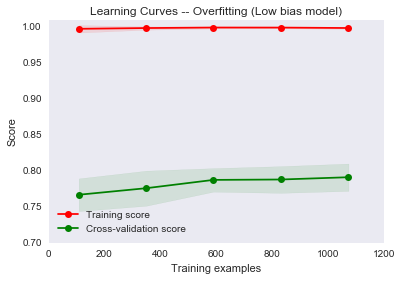

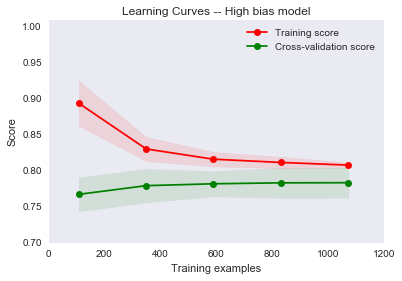

In [205]:
from sklearn import cross_validation



# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=20, test_size=0.2, random_state=0)

title = "Learning Curves -- Overfitting (Low bias model)"
estimator = rf_best
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

title_bias = "Learning Curves -- High bias model"
estimator_bias = RandomForestClassifier(max_depth=4, max_features=rf_best.max_features, 
                                        n_estimators=rf_best.n_estimators)
plot_learning_curve(estimator_bias, title_bias, X, y, (0.7, 1.01), cv=cv)
plt.show()

Additionally, we plot the leanring curve for the classigier that resulted in the best F1 score.<br>
This classifier shows higher bias than the one with the best accuracy, but less than the classifier with a max depth of 4.

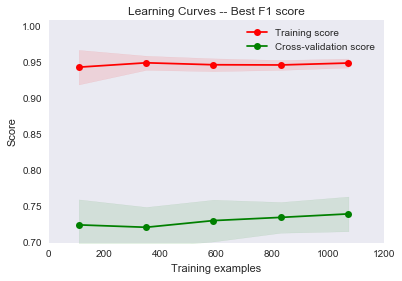

In [207]:
title = "Learning Curves -- Best F1 score"
estimator = rf_best_f1
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

# Exercise 2

_Aggregate the referee information grouping by soccer player, and use an unsupervised learning technique to cluster the soccer players in 2 disjoint clusters. Remove features iteratively, and at each step perform again the clustering and compute the silhouette score -- can you find a configuration of features with high silhouette score where players with dark and light skin colors belong to different clusters? Discuss the obtained results._

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Getting referee specific information

In [148]:
df_unique_players.head()

,height,weight,skin_color,games,victories,ties,defeats,yellowCards,yellowReds,redCards,meanIAT,meanExp,seIAT,seExp
0,177.0,72.0,0,144,65,32,47,21,1,2,0.354267,0.618606,0.018960,0.114434
1,179.0,82.0,1,427,183,101,143,33,0,2,0.330643,0.332495,0.033839,0.194338
2,182.0,71.0,0,654,247,179,228,19,0,0,0.333195,0.400637,0.019941,0.142181
3,187.0,80.0,0,285,138,57,90,50,4,3,0.354477,0.470089,0.029963,0.161181
4,180.0,68.0,1,214,88,54,72,34,0,0,0.340754,0.488418,0.024648,0.226929


In [149]:
X_cluster = df_unique_players.values

We will use the KMeans clustering algorithm with the following paramters.

In [150]:
clusterer = KMeans(n_clusters=2,random_state=1)

In [151]:
import itertools

In [152]:
df_ref_info = df_unique_players.drop(['skin_color'],axis=1)

The following cell runs the clustering algorithm over all the possible combinations of the features. It takes around 10 minutes. We motivate this below.

In [153]:
n_features = X_cluster.shape[1]
feature_list = ['height','weight','games','victories','ties','defeats','meanIAT','meanExp','seIAT','seExp','yellowCards','yellowReds','redCards']

combinations = []
silhouettes = []
error = []
labels = []

for i in range(1,n_features):
    for c in itertools.combinations(feature_list,i):
        combinations.append(list(c))
        
        df_chosen = df_ref_info[list(c)]
        X_chosen = df_chosen.values
        clusters = clusterer.fit_predict(X_chosen)
        labels.append(clusters)
        silhouette_avg = silhouette_score(X_chosen, clusters)
        silhouettes.append(silhouette_avg)
        
        error1 = np.sum(abs(np.subtract(y,clusters)))/len(y)
        error2 = np.sum(abs(np.subtract(-y+1,clusters)))/len(y)
        error.append(min(error1,error2))

We plot the silhoutte scores obtained.

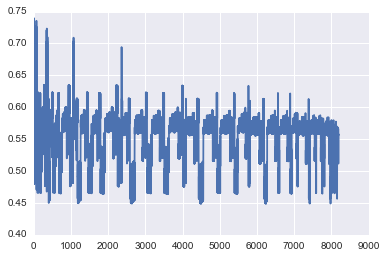

In [154]:
plt.plot(silhouettes)

We also plot the errors obtained, where error is defined as the edit distance between the clustering output and the actual labels.

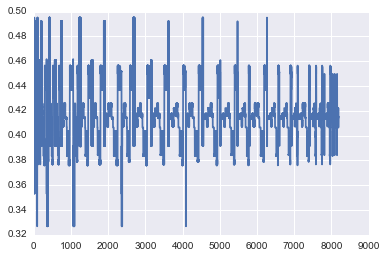

In [155]:
plt.plot(error)

The max silhoutte score obtained is 0.739.

In [156]:
max(silhouettes)

0.73946737649807859

Here, we show a scatter plot of error (on the y-axis) and silhouette score (on the x-axis).

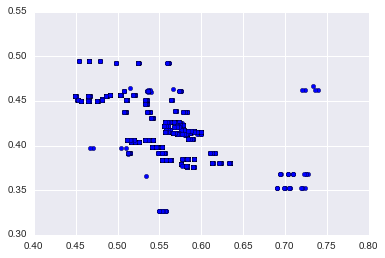

In [157]:
plt.scatter(silhouettes,error)

We will show these results in a `DataFrame` and sort it by silhouette score, to see which combinations resulted in a high silhouette score, and to see how these combinations fair with respect to error.

In [164]:
combinations_df = pd.DataFrame(combinations)

In [166]:
combinations_df['sil'] = silhouettes

In [167]:
combinations_df['err'] = error

In [192]:
sort_combs_df = combinations_df.sort(columns=['sil'], ascending=False)

In [195]:
sort_combs_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,sil,err
7,meanExp,None,None,None,None,None,None,None,None,None,None,None,None,0.739467,0.462398
70,meanIAT,meanExp,None,None,None,None,None,None,None,None,None,None,None,0.735577,0.461653
6,meanIAT,None,None,None,None,None,None,None,None,None,None,None,None,0.733981,0.466865
11,yellowReds,None,None,None,None,None,None,None,None,None,None,None,None,0.728128,0.368578
83,seIAT,yellowReds,None,None,None,None,None,None,None,None,None,None,None,0.725458,0.368578
74,meanIAT,yellowReds,None,None,None,None,None,None,None,None,None,None,None,0.724797,0.368578
12,redCards,None,None,None,None,None,None,None,None,None,None,None,None,0.723565,0.352941
76,meanExp,seIAT,None,None,None,None,None,None,None,None,None,None,None,0.723553,0.462398
349,meanIAT,seIAT,yellowReds,None,None,None,None,None,None,None,None,None,None,0.723381,0.368578
84,seIAT,redCards,None,None,None,None,None,None,None,None,None,None,None,0.720984,0.352941


We see that when we use only the `meanExp` as a feature, we get the highest silhoutte score of 0.739.<br>
However, the error in this case is 46.2%.<br>
A much better set of features is `meanIAT` and `yellowReds` for example, which have a silhoutte score of 0.724, and an error of 36.8%.<br>

We realise that this approach inspects certain combinations (since it inspects all) of features that would not have been inspected by the iterative approach, hence we use it instead.

As a final note, we see that although the silhouette score is generally high (which means there are some well-defined clusters), these clusters do not represent a difference in skin color. Players with different skin colors belong to different clusters, as seen from the (not-so-low) error rate.